In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_diabetes

Dia=load_diabetes()
print(Dia.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [7]:
df=pd.DataFrame(Dia.data,columns=Dia.feature_names)
df["TARGET"]=Dia.target
df.tail()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [9]:
scaler=StandardScaler()
df.values[:,:-1]=scaler.fit_transform(df.values[:,:-1])
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508,178.0
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254,104.0
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674,132.0
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154,220.0
441,-0.956004,-0.938537,-1.535374,-1.711626,1.760535,0.584649,3.654268,-0.830301,-0.088717,0.064426,57.0


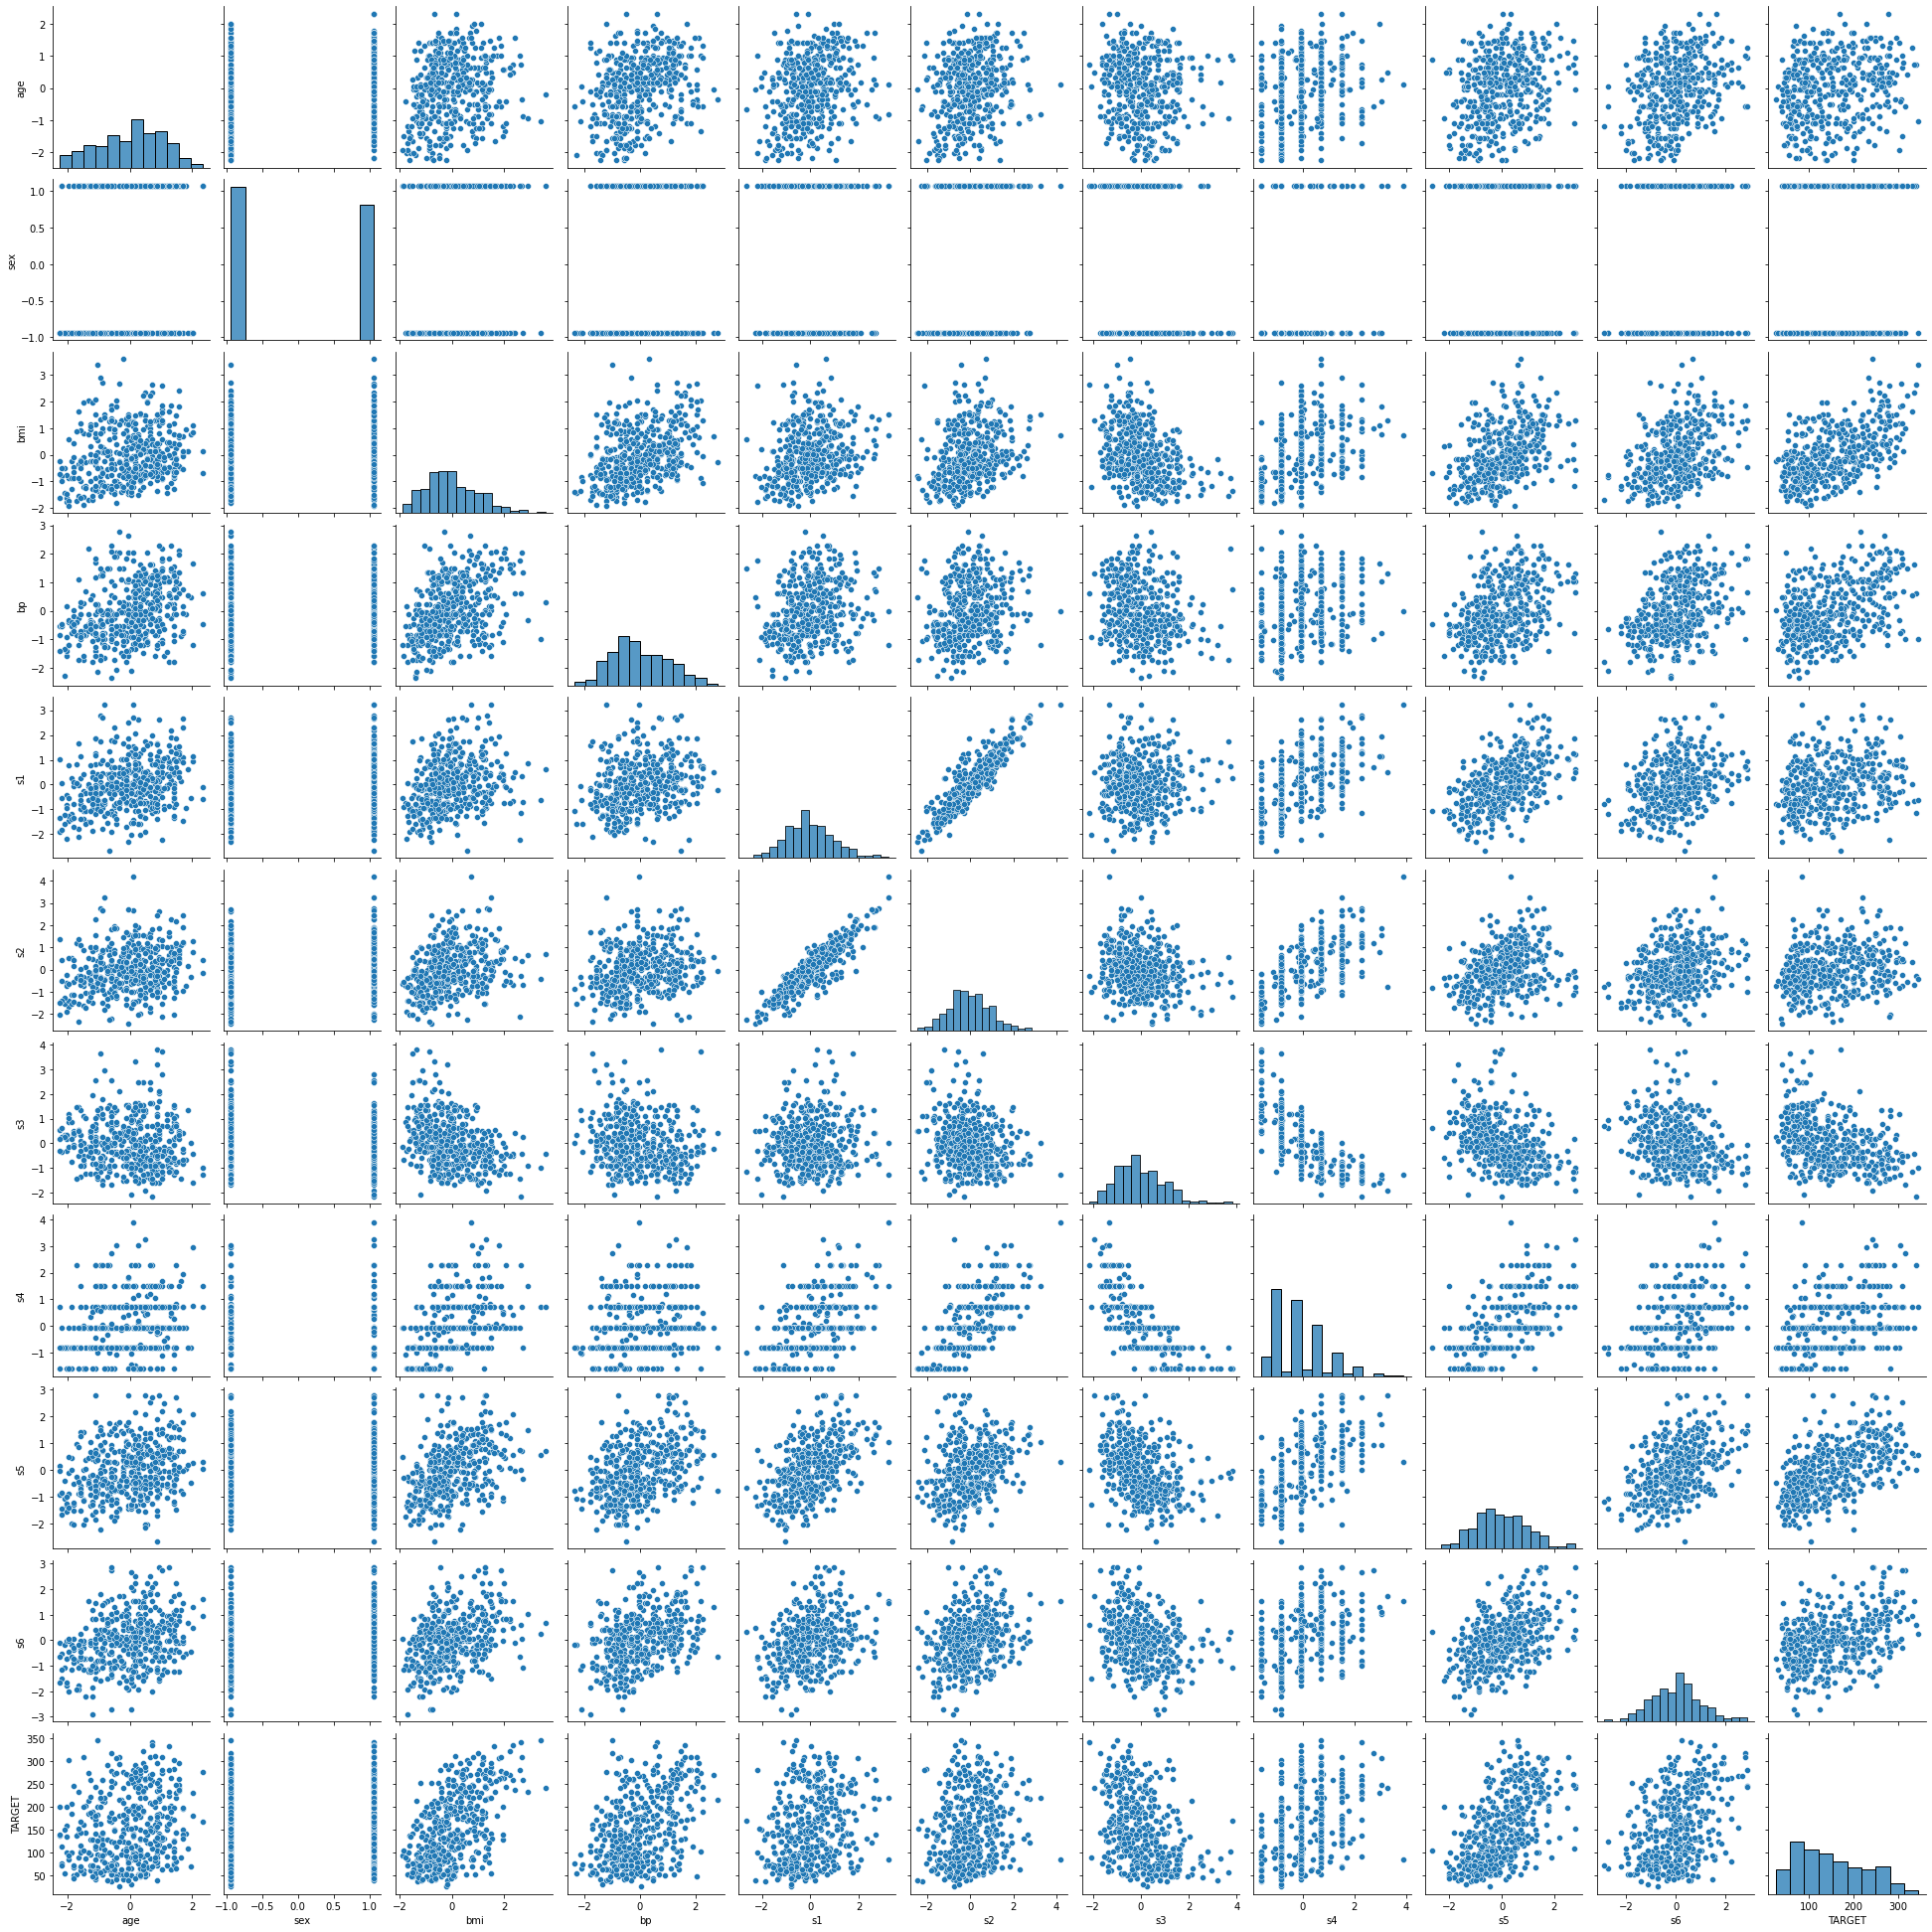

In [54]:
sns.pairplot(df)
plt.show()

# Train Model with Pytorch

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
data= torch.from_numpy(df.values).float()

data.shape

torch.Size([442, 11])

In [22]:
x=data[:,:-1]
y=data[:,-1:]
print(x.shape, y.shape)

torch.Size([442, 10]) torch.Size([442, 1])


In [49]:
n_epochs=100000
learning_rate=1e-4
print_interval=5000

# Build Models

## build Model using nn.Module

In [50]:
relu=nn.ReLU()
leaky_relu=nn.LeakyReLU(0.2)

In [51]:
class REg(nn.Module) :
    def __init__(self,input_dim, output_dim) :
        self.input_dim=input_dim
        self.output_dim=output_dim
        super().__init__()
        
        self.Linear1=nn.Linear(input_dim,3)
        self.Linear2=nn.Linear(3,3)
        self.Linear3=nn.Linear(3,output_dim)
        self.act=nn.LeakyReLU(0.2)
        
    def forward(self,x) :# forward propagation definition
        h=self.act(self.Linear1(x)) # depth 1 Dimension input -> 3
        h=self.act(self.Linear2(h)) # depth 2 Dimension 3->3
        y=self.Linear3(h)# delpth 3 Dimension 3 -> ouput
        
        return y
model=REg(x.size(-1),y.size(-1))# class heritage
model
    

REg(
  (Linear1): Linear(in_features=10, out_features=3, bias=True)
  (Linear2): Linear(in_features=3, out_features=3, bias=True)
  (Linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): LeakyReLU(negative_slope=0.2)
)

## build regression & back propagation

In [52]:
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [53]:
for i in range(n_epochs) :
    y_hat = model(x)
    loss = F.mse_loss(y_hat,y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    if(i+1)% print_interval ==0 :
        print("Epochs : %d    Loss : %.4e" %(i+1,loss))
        

Epochs : 5000    Loss : 2.6273e+03
Epochs : 10000    Loss : 2.5104e+03
Epochs : 15000    Loss : 2.4769e+03
Epochs : 20000    Loss : 2.4635e+03
Epochs : 25000    Loss : 2.4576e+03
Epochs : 30000    Loss : 2.4566e+03
Epochs : 35000    Loss : 2.4561e+03
Epochs : 40000    Loss : 2.4557e+03
Epochs : 45000    Loss : 2.4531e+03
Epochs : 50000    Loss : 2.4501e+03
Epochs : 55000    Loss : 2.4439e+03
Epochs : 60000    Loss : 2.4215e+03
Epochs : 65000    Loss : 2.4035e+03
Epochs : 70000    Loss : 2.3780e+03
Epochs : 75000    Loss : 2.3591e+03
Epochs : 80000    Loss : 2.3549e+03
Epochs : 85000    Loss : 2.3506e+03
Epochs : 90000    Loss : 2.3468e+03
Epochs : 95000    Loss : 2.3455e+03
Epochs : 100000    Loss : 2.3421e+03


# Plotting the Result!


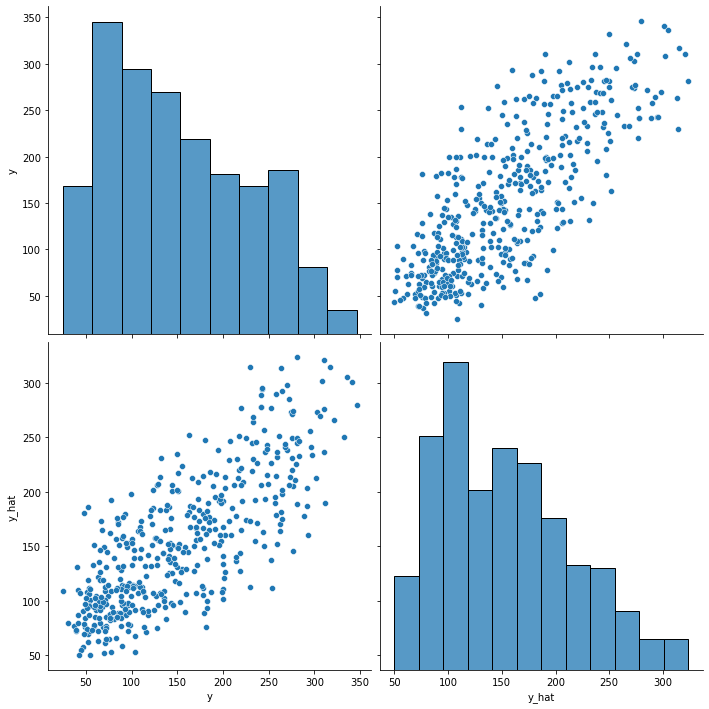

In [55]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()